In [2]:
%load_ext autoreload
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn enhances the aesthetics of matplotlib plots

import pandas as pd
import xarray as xr
import seaborn as sns
import warnings
import logging
# sns.set()

from tempest import casestudy
from tempest import grid
from tempest import storm_tracker
from tempest import joint_distrib
from tempest import handler
from tempest.plots.hist import simple_hist

In [3]:
# settings_path = 'settings/sam_4km_30min_30d.yaml'
settings_paths = [
"settings/obs_winter_30d.yaml",
  "settings/obs_summer_30d.yaml",
  
  "settings/arpege_winter_30d.yaml", 
  "settings/arpege_summer_30d.yaml", 
  
  "settings/ifs_winter_30d.yaml" , 
  "settings/ifs_summer_30d.yaml" , 
  
  "settings/mpas_winter_30d.yaml", 
  "settings/mpas_summer_30d.yaml", 


  "settings/screamv1_winter_30d.yaml",
  "settings/screamv1_summer_30d.yaml", 
 
  "settings/sam_winter_30d.yaml", 
  "settings/sam_summer_30d.yaml", 
  "settings/um_winter_30d.yaml",
  "settings/um_summer_30d.yaml",

    "settings/xshield_winter_30d.yaml" , 
    "settings/fv3_summer_30d.yaml", 
    
    "settings/geos_winter_30d.yaml", 
    "settings/grist_winter_30d.yaml", 
    "settings/nicam_summer_30d.yaml", 
    ]

hdlrs = [handler.Handler(settings_path) for settings_path in settings_paths]
css = [casestudy.CaseStudy(hdlr, overwrite = False ,verbose = False) for hdlr in hdlrs]
grs = [grid.Grid(cs, fast = True, overwrite= False, verbose_steps = False, verbose = False) for cs in css]
lm = grs[0].get_landmask()
ocean = lm.Landmask == 0
ocean = ocean.values[:,:,np.newaxis]
## extreme distribs
jds = [joint_distrib.JointDistribution(gr, None, var_id_1 = "mean_unweighted_Prec", var_id_2 = "cond_alpha_75_Prec", 
        nbpd = 20,  nd=4, overwrite = False, dist_mask = False) for gr in grs]

Data loaded from /scratchx/mcarenso/tempest/OBS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/OBS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/ARPEGE_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/IFS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/MPAS_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Winter_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SCREAMv1_Summer_lowRes_Tropics/var_id_days_i_t.json
Data loaded from /scratchx/mcarenso/tempest/SAM_Winter_lowRes_Tropics/va

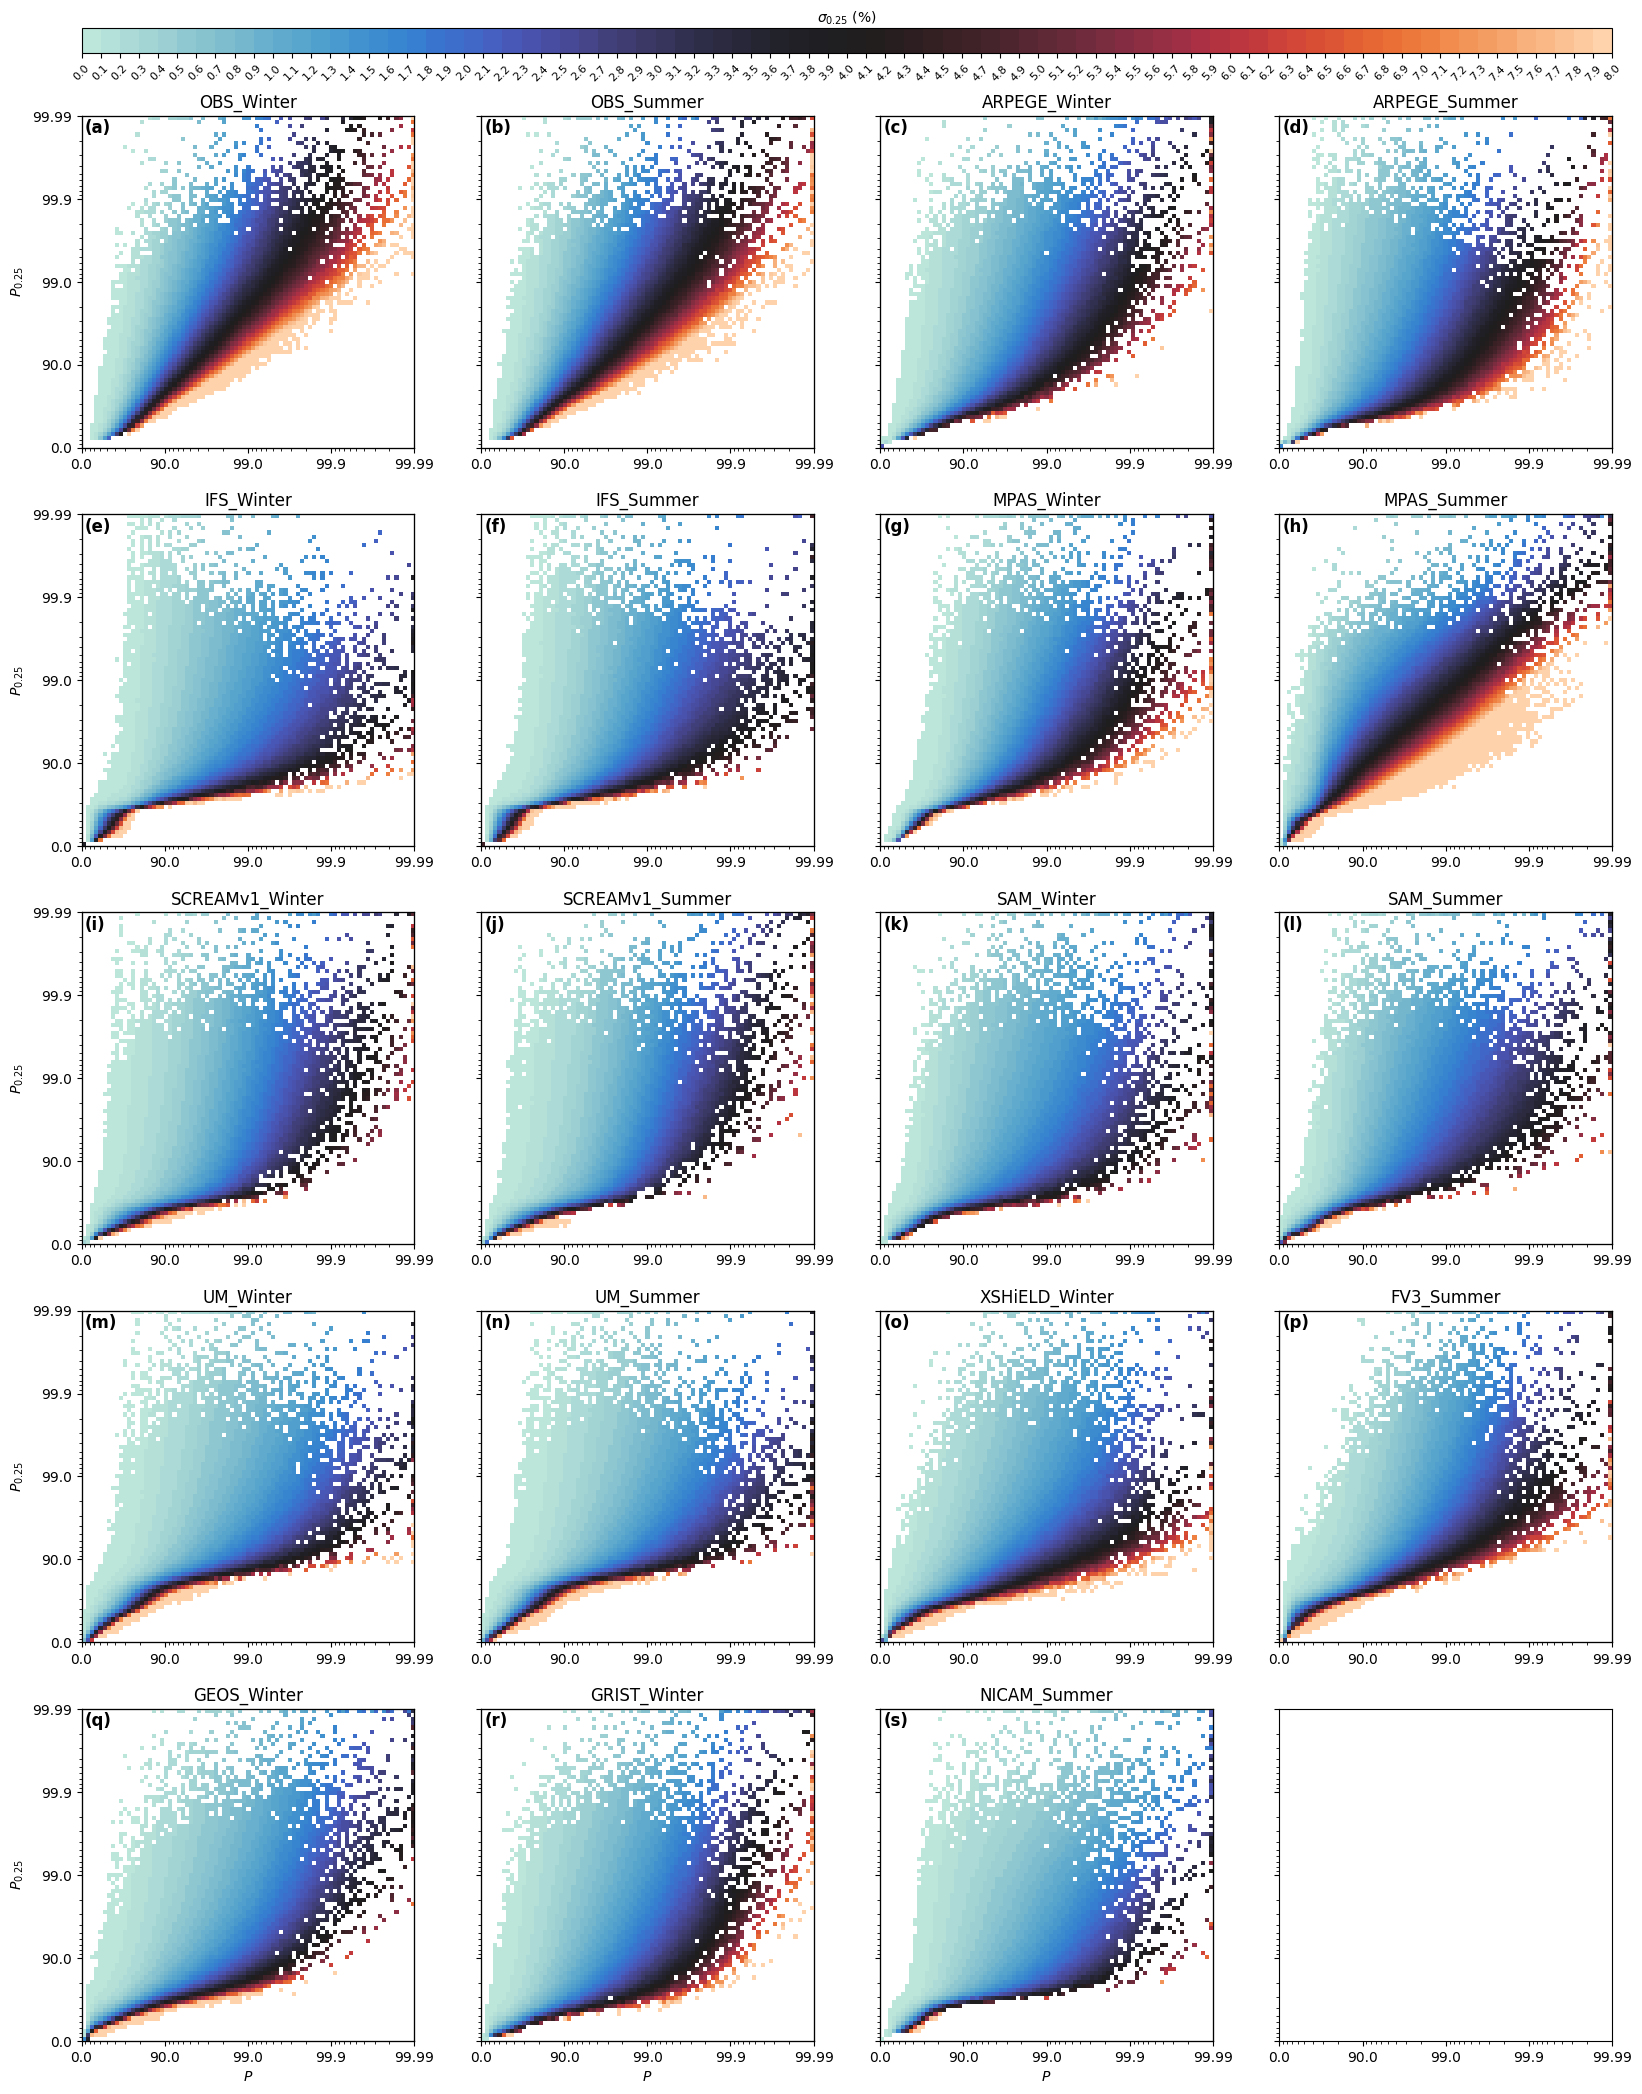

In [20]:
nrow = len(jds)//4 + 1
fig, axs  = plt.subplots(nrow, 4, figsize = (19.75, 5*nrow), sharex = True, sharey = True)

cmap = sns.color_palette("icefire", as_cmap=True)
values_and_boundaries = np.arange(0, 0.081, 0.001)
values = values_and_boundaries[::]
boundaries  = values_and_boundaries[::]
norm = mpl.colors.BoundaryNorm(boundaries, cmap.N)

width = 0.775
bottom = 0.905
height = 0.01
cax = fig.add_axes([0.125, bottom, width, height])  # [left, bottom, width, height]
cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), cax=cax, orientation = "horizontal", ticks=values, spacing='proportional')
cbar.set_label(r'$\sigma_{0.25}$ (%)')
cbar.ax.xaxis.set_label_position('top')
# Convert ticks to percentages
tick_labels = [f'{round(val*100, 1)}' for val in values]  
cbar.set_ticks(values)
cbar.set_ticklabels(tick_labels)

for tick in cbar.ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_fontsize(8)
    tick.set_horizontalalignment('center')

letters = ["("+chr(97 + i)+")" for i in range(len(jds))]  

for i, jd, ax, letter in zip(np.arange(len(jds)), jds, axs.flatten(), letters): 
    model_name = str(jd.settings["MODEL"][:-7])
    
    ax, cbar, ax_show, _ = jd.plot_var_id_func_over_jdist('Prec', func = 'Sigma_cond_alpha_75', title= model_name, mask = "all", cmap = cmap, norm = norm, fig = fig, ax = ax)
    cbar.remove()
    ax.set_aspect('auto', adjustable='box')  # This will prevent the aspect conflict
    ax.text(0.01, 0.99, letter, transform=ax.transAxes, fontsize=12, fontweight='bold', va='top')

    if i >= 16:
        ax.set_xlabel(r"$P$")

    else : 
        ax.set_xlabel("")
        ax.set_xticks([])
        # ax.set_xticklabels([])

    if i%4== 0 :
        ax.set_ylabel(r"$P_{0.25}$")
    else :
        ax.set_ylabel("")


